# Training

In [1]:

import torch
import random

# from torchvision import transforms
from PIL import Image
import os
import pandas as pd
import json

from matplotlib import pyplot as plt

from ipynb.fs.full.read_in_data import read_in_data

from transforms import train_transforms
from dataset import ContrastiveLearningDataset

## Loading data

In [2]:

with open("../public_dataset/reference_images_part1.json") as f:
    ref_json = json.load(f)

dir_str = "../public_dataset/reference_images_part1"
df = read_in_data(dir_str, ref_json)

df = df.sort_values('category_id')
df = df.reset_index(drop=True)
df.head()

,id,image_id,bbox,category_id,img
0,155,33,"[116, 97, 411, 126]",1,<PIL.Image.Image image mode=RGBA size=411x126 ...
1,33,6,"[573, 246, 164, 298]",1,<PIL.Image.Image image mode=RGBA size=164x298 ...
2,32,6,"[114, 269, 363, 223]",1,<PIL.Image.Image image mode=RGBA size=363x223 ...
3,30,6,"[622, 218, 374, 220]",1,<PIL.Image.Image image mode=RGBA size=374x220 ...
4,29,6,"[743, 486, 354, 132]",1,<PIL.Image.Image image mode=RGBA size=354x132 ...


10


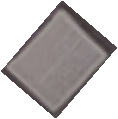

In [3]:
id = 111
img = df['img'][id]
print(df['category_id'][id])
train_transforms(img)

In [4]:
images = df['img']
labels = df['category_id']

val_labels = [4, 10]
val_ids = labels.isin(val_labels)

val_images = images[val_ids].reset_index(drop=True)
val_labels = labels[val_ids].reset_index(drop=True)

train_ids = ~val_ids

train_images = images[train_ids].reset_index(drop=True)
train_labels = labels[train_ids].reset_index(drop=True)

In [5]:
train_dataset = ContrastiveLearningDataset(train_images, train_labels, train_transforms)


(-1, 0.6593406593406593)

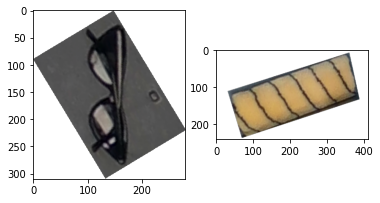

In [37]:
id = random.randrange(0, len(train_dataset))

image_1, image_2, sign, weight = train_dataset[id]

f, axarr = plt.subplots(1,2) 

axarr[0].imshow(image_1)
axarr[1].imshow(image_2)

sign, weight

In [ ]:
BATCH_SIZE = 64

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    BATCH_SIZE, 
    shuffle=True, 
    num_workers=0,
    pin_memory=True,
)

## Training loop

In [ ]:
EPOCHS = 10

In [ ]:
model = ...
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)

def contrastive_learning_loss(v_1, v_2, weight, sign):
    cos_sim = cos(v_1, v_2)
    loss = - weight * cos_sim * sign
    return loss.mean()

In [ ]:
for epoch in range(EPOCHS):
    losses = []
    for i, data in enumerate(train_loader, 0):
        image_1, image_2, sign, weight = data
        v_1 = model(image_1)
        v_2 = model(image_2)
        
        loss = contrastive_learning_loss(v_1, v_2, weight, sign)
        losses.append(loss)
        loss.backward()
        optimizer.step()
        
        # YOUR CODE HERE
        
        # TODO: walidacja, wypisywanie lossów itd
        # END YOUR CODE